# Data Profilling

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("../cleaned_data.csv",header=0)

df.head()

,customer_id,gender,is_urban,is_married,has_chidren,period,housing_service,get_multi_bonus,web_stability_problem,online_guide_service,...,sales_support,pay_after_try,installment_pay,member_type,is_vip,pay_method,avg_month_consumption,total_consumption,is_warning_loss,supplier
0,7590-VHVEG,Female,0,Yes,No,1,No,other,No,Yes,...,No,No,No,Month,Yes,PayPal,29.85,29.85,No,Starlink
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,No,No,One year,No,Venmo,56.95,1889.5,No,T-Mobile
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,Month,Yes,Venmo,53.85,108.15,Yes,HughesNet
3,7795-CFOCW,Male,0,No,No,45,No,other,Yes,No,...,Yes,No,No,One year,No,Visa,42.30,1840.75,No,T-Mobile
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,No,No,Month,Yes,PayPal,70.70,151.65,Yes,AT&T


In [6]:
df.shape

(4589, 21)

In [7]:
df.info

<bound method DataFrame.info of      customer_id  gender  is_urban is_married has_chidren  period  \
0     7590-VHVEG  Female         0        Yes          No       1   
1     5575-GNVDE    Male         0         No          No      34   
2     3668-QPYBK    Male         0         No          No       2   
3     7795-CFOCW    Male         0         No          No      45   
4     9237-HQITU  Female         0         No          No       2   
...          ...     ...       ...        ...         ...     ...   
4584  8746-OQQRW    Male         0         No          No       4   
4585  3181-MIZBN    Male         0        Yes         Yes      16   
4586  0471-ARVMX  Female         1        Yes          No      62   
4587  7766-CLTIC  Female         0         No          No      10   
4588  5650-YLIBA    Male         0         No          No      31   

     housing_service get_multi_bonus web_stability_problem  \
0                 No           other                    No   
1              

In [8]:
df.columns

Index(['customer_id', 'gender', 'is_urban', 'is_married', 'has_chidren',
       'period', 'housing_service', 'get_multi_bonus', 'web_stability_problem',
       'online_guide_service', 'is_member', 'sales_support', 'pay_after_try',
       'installment_pay', 'member_type', 'is_vip', 'pay_method',
       'avg_month_consumption', 'total_consumption', 'is_warning_loss',
       'supplier'],
      dtype='object')

In [9]:
def get_unique_values(df):
    categories = {}
    for column in df.columns:
        unique_value = df[column].unique()
        categories[column] = unique_value
    return categories

In [10]:
get_unique_values(df)

{'customer_id': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '0471-ARVMX',
        '7766-CLTIC', '5650-YLIBA'], shape=(4580,), dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'is_urban': array([0, 1]),
 'is_married': array(['Yes', 'No'], dtype=object),
 'has_chidren': array(['No', 'Yes'], dtype=object),
 'period': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'housing_service': array(['No', 'Yes'], dtype=object),
 'get_multi_bonus': array(['other', 'No', 'Yes'], dtype=object),
 'web_stability_problem': array(['No', 'Yes', 'other'], dtype=object),
 'online_guide_service': array(['Yes', 'No', 'other'], dtype=object),
 'is_member': array(['No', 'Yes', 'other'], dtype=object),
 

In [11]:
# Feature categorization: categorical features, continuous features, and target label (y)
# Categorical features
cat_cols = ['customer_id', 'gender', 'is_urban', 'is_married', 'has_chidren', 
                'housing_service', 'get_multi_bonus', 'supplier', 'web_stability_problem', 'online_guide_service', 
                'is_member', 'sales_support', 'pay_after_try', 'installment_pay', 'member_type', 'is_vip',
                'pay_method']

# Continuous features
num_cols = ['period','avg_month_consumption', 'total_consumption']

# Target label (y)
target = 'is_warning_loss'

## Data Preprocessing

### Data Deduplication

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated()]

,customer_id,gender,is_urban,is_married,has_chidren,period,housing_service,get_multi_bonus,web_stability_problem,online_guide_service,...,sales_support,pay_after_try,installment_pay,member_type,is_vip,pay_method,avg_month_consumption,total_consumption,is_warning_loss,supplier
10,6388-TABGU,Male,0,No,Yes,62,Yes,No,Yes,Yes,...,No,No,No,One year,No,Visa,56.15,3487.95,No,T-Mobile


In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Value Handling

For both continuous and categorical fields, check for missing values separately. If any are found, consider using mean or median imputation for continuous features, and mode imputation for categorical features.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4588 non-null   object 
 1   gender                 4588 non-null   object 
 2   is_urban               4588 non-null   int64  
 3   is_married             4588 non-null   object 
 4   has_chidren            4588 non-null   object 
 5   period                 4588 non-null   int64  
 6   housing_service        4588 non-null   object 
 7   get_multi_bonus        4588 non-null   object 
 8   web_stability_problem  4588 non-null   object 
 9   online_guide_service   4588 non-null   object 
 10  is_member              4588 non-null   object 
 11  sales_support          4588 non-null   object 
 12  pay_after_try          4588 non-null   object 
 13  installment_pay        4588 non-null   object 
 14  member_type            4588 non-null   object 
 15  is_v

In [16]:
get_unique_values(df[cat_cols])

{'customer_id': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '0471-ARVMX',
        '7766-CLTIC', '5650-YLIBA'], shape=(4580,), dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'is_urban': array([0, 1]),
 'is_married': array(['Yes', 'No'], dtype=object),
 'has_chidren': array(['No', 'Yes'], dtype=object),
 'housing_service': array(['No', 'Yes'], dtype=object),
 'get_multi_bonus': array(['other', 'No', 'Yes'], dtype=object),
 'supplier': array(['Starlink', 'T-Mobile', 'HughesNet', 'AT&T', 'Verizon', 'Xfinity'],
       dtype=object),
 'web_stability_problem': array(['No', 'Yes', 'other'], dtype=object),
 'online_guide_service': array(['Yes', 'No', 'other'], dtype=object),
 'is_member': array(['No', 'Yes', 'other'], dtype=object),
 'sales_support': array(['No', 'Yes', 'other'], dtype=object),
 'pay_after_try': array(['No', 'Yes', 'other'], dtype=object),
 'installment_pay': array(['No', 'Yes', 'other'], dtype=object),
 'member_type': array(['Month', 'One year', 

In [17]:
df['pay_method'].value_counts()

pay_method
PayPal        1537
Venmo         1037
Visa          1012
Mastercard    1002
Name: count, dtype: int64

In [18]:
df['pay_method'].fillna(df['pay_method'].mode()[0], inplace=True)

/var/folders/6v/4ss4l4lx78sgr4_34jdpj3h00000gp/T/ipykernel_1798/1170358468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pay_method'].fillna(df['pay_method'].mode()[0], inplace=True)


In [19]:
df['pay_method'].value_counts()

pay_method
PayPal        1537
Venmo         1037
Visa          1012
Mastercard    1002
Name: count, dtype: int64

In [20]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   period                 4588 non-null   int64  
 1   avg_month_consumption  4588 non-null   float64
 2   total_consumption      4588 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 107.7+ KB


In [21]:
df['total_consumption'] = df['total_consumption'].replace(' ', np.nan)

In [22]:
df['total_consumption']=df['total_consumption'].astype(float)

In [23]:
df['total_consumption'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: total_consumption, dtype: float64

In [24]:
df['total_consumption'].isnull().sum()

np.int64(8)

In [25]:
df[df['total_consumption'].isnull()]

,customer_id,gender,is_urban,is_married,has_chidren,period,housing_service,get_multi_bonus,web_stability_problem,online_guide_service,...,sales_support,pay_after_try,installment_pay,member_type,is_vip,pay_method,avg_month_consumption,total_consumption,is_warning_loss,supplier
496,4472-LVYGI,Female,0,Yes,Yes,0,No,other,Yes,No,...,Yes,Yes,No,Two year,Yes,Visa,52.55,NaN,No,Starlink
761,3115-CZMZD,Male,0,No,Yes,0,Yes,No,other,other,...,other,other,other,Two year,No,Venmo,20.25,NaN,No,HughesNet
944,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,...,No,Yes,Yes,Two year,No,Venmo,80.85,NaN,No,T-Mobile
1090,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,other,other,...,other,other,other,Two year,No,Venmo,25.75,NaN,No,AT&T
1348,1371-DWPAZ,Female,0,Yes,Yes,0,No,other,Yes,Yes,...,Yes,Yes,No,Two year,No,Mastercard,56.05,NaN,No,HughesNet
3339,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,other,other,...,other,other,other,Two year,No,Venmo,19.85,NaN,No,Starlink
3834,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,other,other,...,other,other,other,Two year,No,Venmo,25.35,NaN,No,T-Mobile
4388,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,other,other,...,other,other,other,Two year,No,Venmo,20.00,NaN,No,Verizon


In [26]:
df['total_consumption'].fillna(df['total_consumption'].mean(), inplace=True)

/var/folders/6v/4ss4l4lx78sgr4_34jdpj3h00000gp/T/ipykernel_1798/1156694781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_consumption'].fillna(df['total_consumption'].mean(), inplace=True)


In [27]:
df['total_consumption'].isnull().sum()

np.int64(0)

In [28]:
df['is_warning_loss']=df['is_warning_loss'].astype(str)

### Outlier Detection

Use the 3-sigma rule for outlier detection. Define the lower and upper bounds as mean - 3 × standard deviation and mean + 3 × standard deviation, respectively. Any data points falling outside this range are considered outliers and should be removed.

In [29]:
df[num_cols].describe().T  

,count,mean,std,min,25%,50%,75%,max
period,4588.0,32.171752,24.626624,0.00,8.0000,28.000,55.0000,72.00
avg_month_consumption,4588.0,64.823049,30.090081,18.25,35.4875,70.450,89.9000,118.65
total_consumption,4588.0,2273.151856,2267.297959,18.80,388.9750,1398.975,3745.0375,8564.75


In [30]:
MonthlyChargesUpper = df['avg_month_consumption'].mean()+3*df['avg_month_consumption'].std() 
MonthlyChargesLower = df['avg_month_consumption'].mean()- 3*df['avg_month_consumption'].std() 

TotalChargesUpper = df['total_consumption'].mean()+3*df['total_consumption'].std() 
TotalChargeslower = df['total_consumption'].mean()-3*df['total_consumption'].std() 
print('MonthlyChargesUpper:',MonthlyChargesUpper,'\n',
      'MonthlyChargesLower:',MonthlyChargesLower,'\n',
      'TotalChargesUpper:',TotalChargesUpper,'\n',
      'TotalChargeslower:',TotalChargeslower,'\n'
     )

MonthlyChargesUpper: 155.0932928633164 
 MonthlyChargesLower: -25.447194345443677 
 TotalChargesUpper: 9075.045733456845 
 TotalChargeslower: -4528.742021666452 



In [31]:
df[(df['avg_month_consumption']>=MonthlyChargesUpper) | (df['avg_month_consumption']<=MonthlyChargesLower)]

,customer_id,gender,is_urban,is_married,has_chidren,period,housing_service,get_multi_bonus,web_stability_problem,online_guide_service,...,sales_support,pay_after_try,installment_pay,member_type,is_vip,pay_method,avg_month_consumption,total_consumption,is_warning_loss,supplier


In [32]:
df[(df['total_consumption']>=TotalChargesUpper) | (df['avg_month_consumption']<=TotalChargeslower)]

,customer_id,gender,is_urban,is_married,has_chidren,period,housing_service,get_multi_bonus,web_stability_problem,online_guide_service,...,sales_support,pay_after_try,installment_pay,member_type,is_vip,pay_method,avg_month_consumption,total_consumption,is_warning_loss,supplier


## EDA

In [33]:
df_c=df.copy()

In [34]:
df_c.columns

Index(['customer_id', 'gender', 'is_urban', 'is_married', 'has_chidren',
       'period', 'housing_service', 'get_multi_bonus', 'web_stability_problem',
       'online_guide_service', 'is_member', 'sales_support', 'pay_after_try',
       'installment_pay', 'member_type', 'is_vip', 'pay_method',
       'avg_month_consumption', 'total_consumption', 'is_warning_loss',
       'supplier'],
      dtype='object')

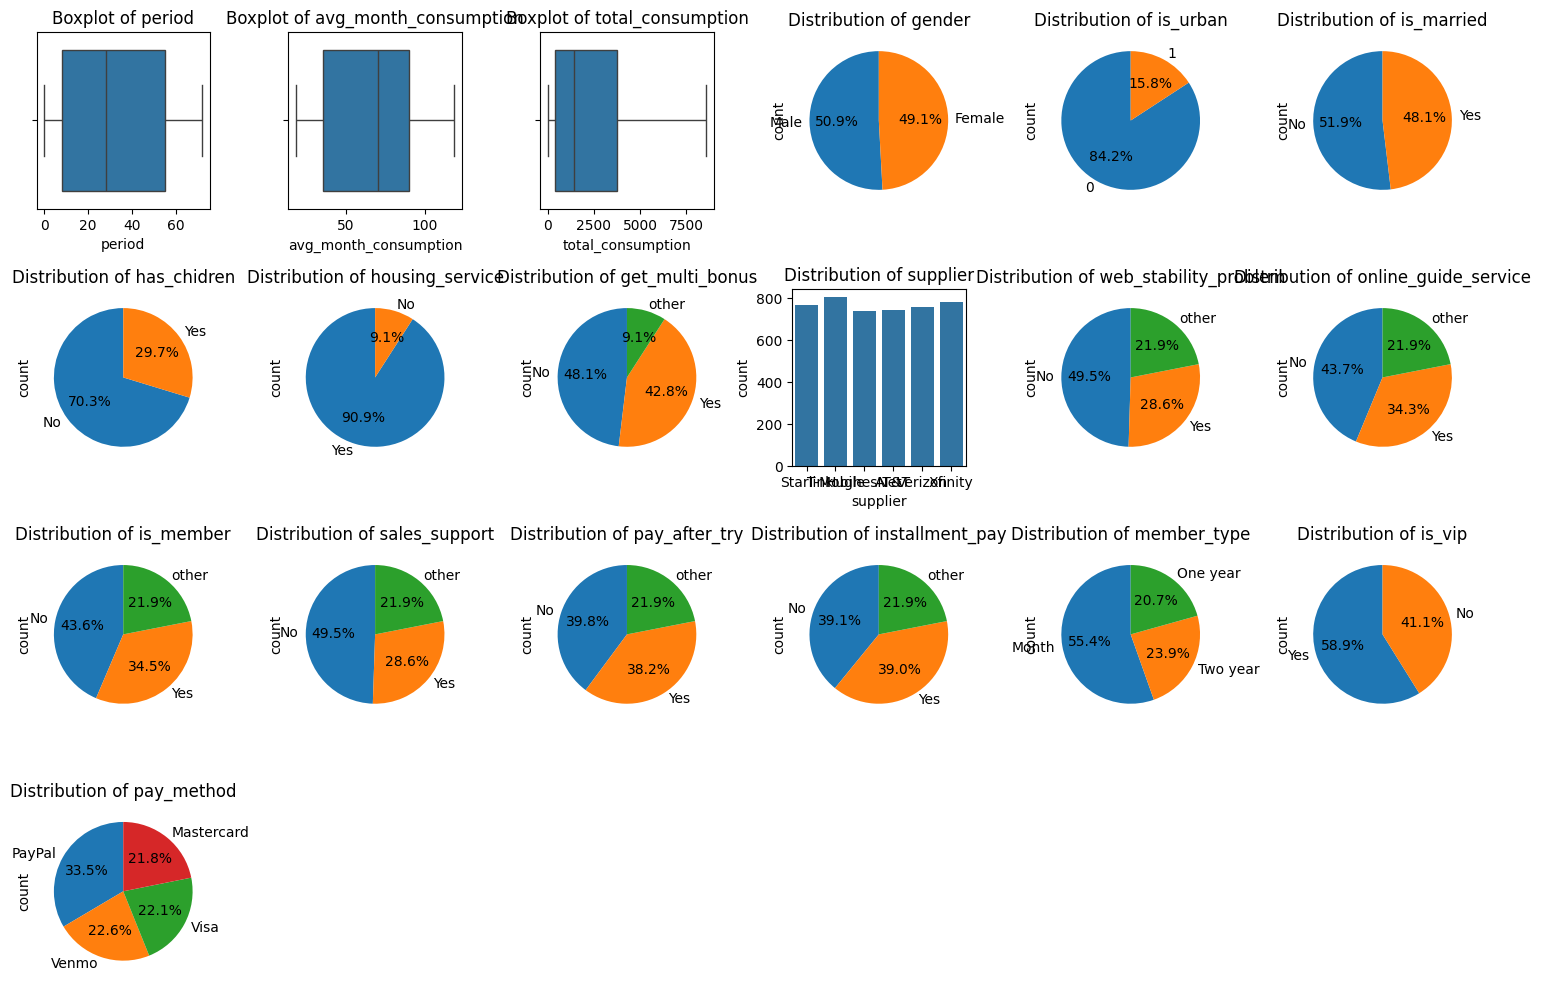

In [36]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
# 设置图形大小
num_rows = 4
num_cols = math.ceil(len(df_c.columns) / num_rows)
plt.figure(figsize=(15, 10))

# 绘制连续型字段的箱型图
numeric_columns = df_c.select_dtypes(include='number').columns
numeric_columns = ['period','avg_month_consumption', 'total_consumption']
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=column, data=df_c)
    plt.title(f'Boxplot of {column}')

# 绘制离散型字段的柱形图或饼图

categorical_columns = df_c.select_dtypes(include='object').columns
categorical_columns = ['gender', 'is_urban', 'is_married', 'has_chidren',  
                'housing_service', 'get_multi_bonus', 'supplier', 'web_stability_problem', 'online_guide_service', 
                'is_member', 'sales_support', 'pay_after_try', 'installment_pay', 'member_type', 'is_vip',
                'pay_method']
for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1 + len(numeric_columns))
    if df_c[column].nunique() > 5: #如果类别数大于5，绘制柱形图
        sns.countplot(x=column, data=df_c)
    else:
        df_c[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column}')

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

In [37]:
df_c[target].value_counts(normalize=True)  # 说明存在样本分布不均衡问题

is_warning_loss
No     0.737358
Yes    0.262642
Name: proportion, dtype: float64

In [38]:
# 将标签Yes/No转化为1/0
df_c['is_warning_loss'].replace(to_replace='Yes', value=1, inplace=True)
df_c['is_warning_loss'].replace(to_replace='No',  value=0, inplace=True)

/var/folders/6v/4ss4l4lx78sgr4_34jdpj3h00000gp/T/ipykernel_1798/1602170286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_c['is_warning_loss'].replace(to_replace='Yes', value=1, inplace=True)
/var/folders/6v/4ss4l4lx78sgr4_34jdpj3h00000gp/T/ipykernel_1798/1602170286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

## Correlation Analysis

In [39]:
df_c=df_c.iloc[:,1:]

In [40]:
df_dummies = pd.get_dummies(df_c)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_urban                     4588 non-null   int64  
 1   period                       4588 non-null   int64  
 2   avg_month_consumption        4588 non-null   float64
 3   total_consumption            4588 non-null   float64
 4   is_warning_loss              4588 non-null   int64  
 5   gender_Female                4588 non-null   bool   
 6   gender_Male                  4588 non-null   bool   
 7   is_married_No                4588 non-null   bool   
 8   is_married_Yes               4588 non-null   bool   
 9   has_chidren_No               4588 non-null   bool   
 10  has_chidren_Yes              4588 non-null   bool   
 11  housing_service_No           4588 non-null   bool   
 12  housing_service_Yes          4588 non-null   bool   
 13  get_multi_bonus_No

<Axes: >

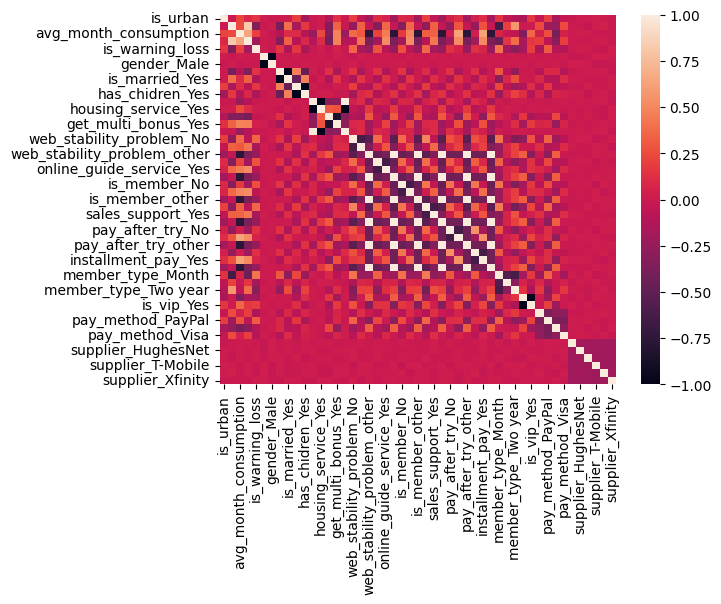

In [41]:
import seaborn as sns 
sns.heatmap(df_dummies.corr())

In [42]:
df_dummies.corr()['is_warning_loss'].sort_values(ascending=False)

is_warning_loss                1.000000
member_type_Month              0.407653
sales_support_No               0.356430
web_stability_problem_No       0.348972
pay_method_PayPal              0.309894
online_guide_service_No        0.273444
is_member_No                   0.261405
avg_month_consumption          0.197402
is_vip_Yes                     0.193864
has_chidren_No                 0.162555
is_urban                       0.148798
is_married_No                  0.147355
pay_after_try_No               0.137476
installment_pay_No             0.132780
installment_pay_Yes            0.066416
pay_after_try_Yes              0.061485
get_multi_bonus_Yes            0.040477
supplier_Xfinity               0.017680
supplier_HughesNet             0.010655
housing_service_Yes            0.009956
gender_Female                  0.009653
supplier_Starlink              0.009053
supplier_AT&T                 -0.007263
gender_Male                   -0.009653
get_multi_bonus_other         -0.009956


<Axes: >

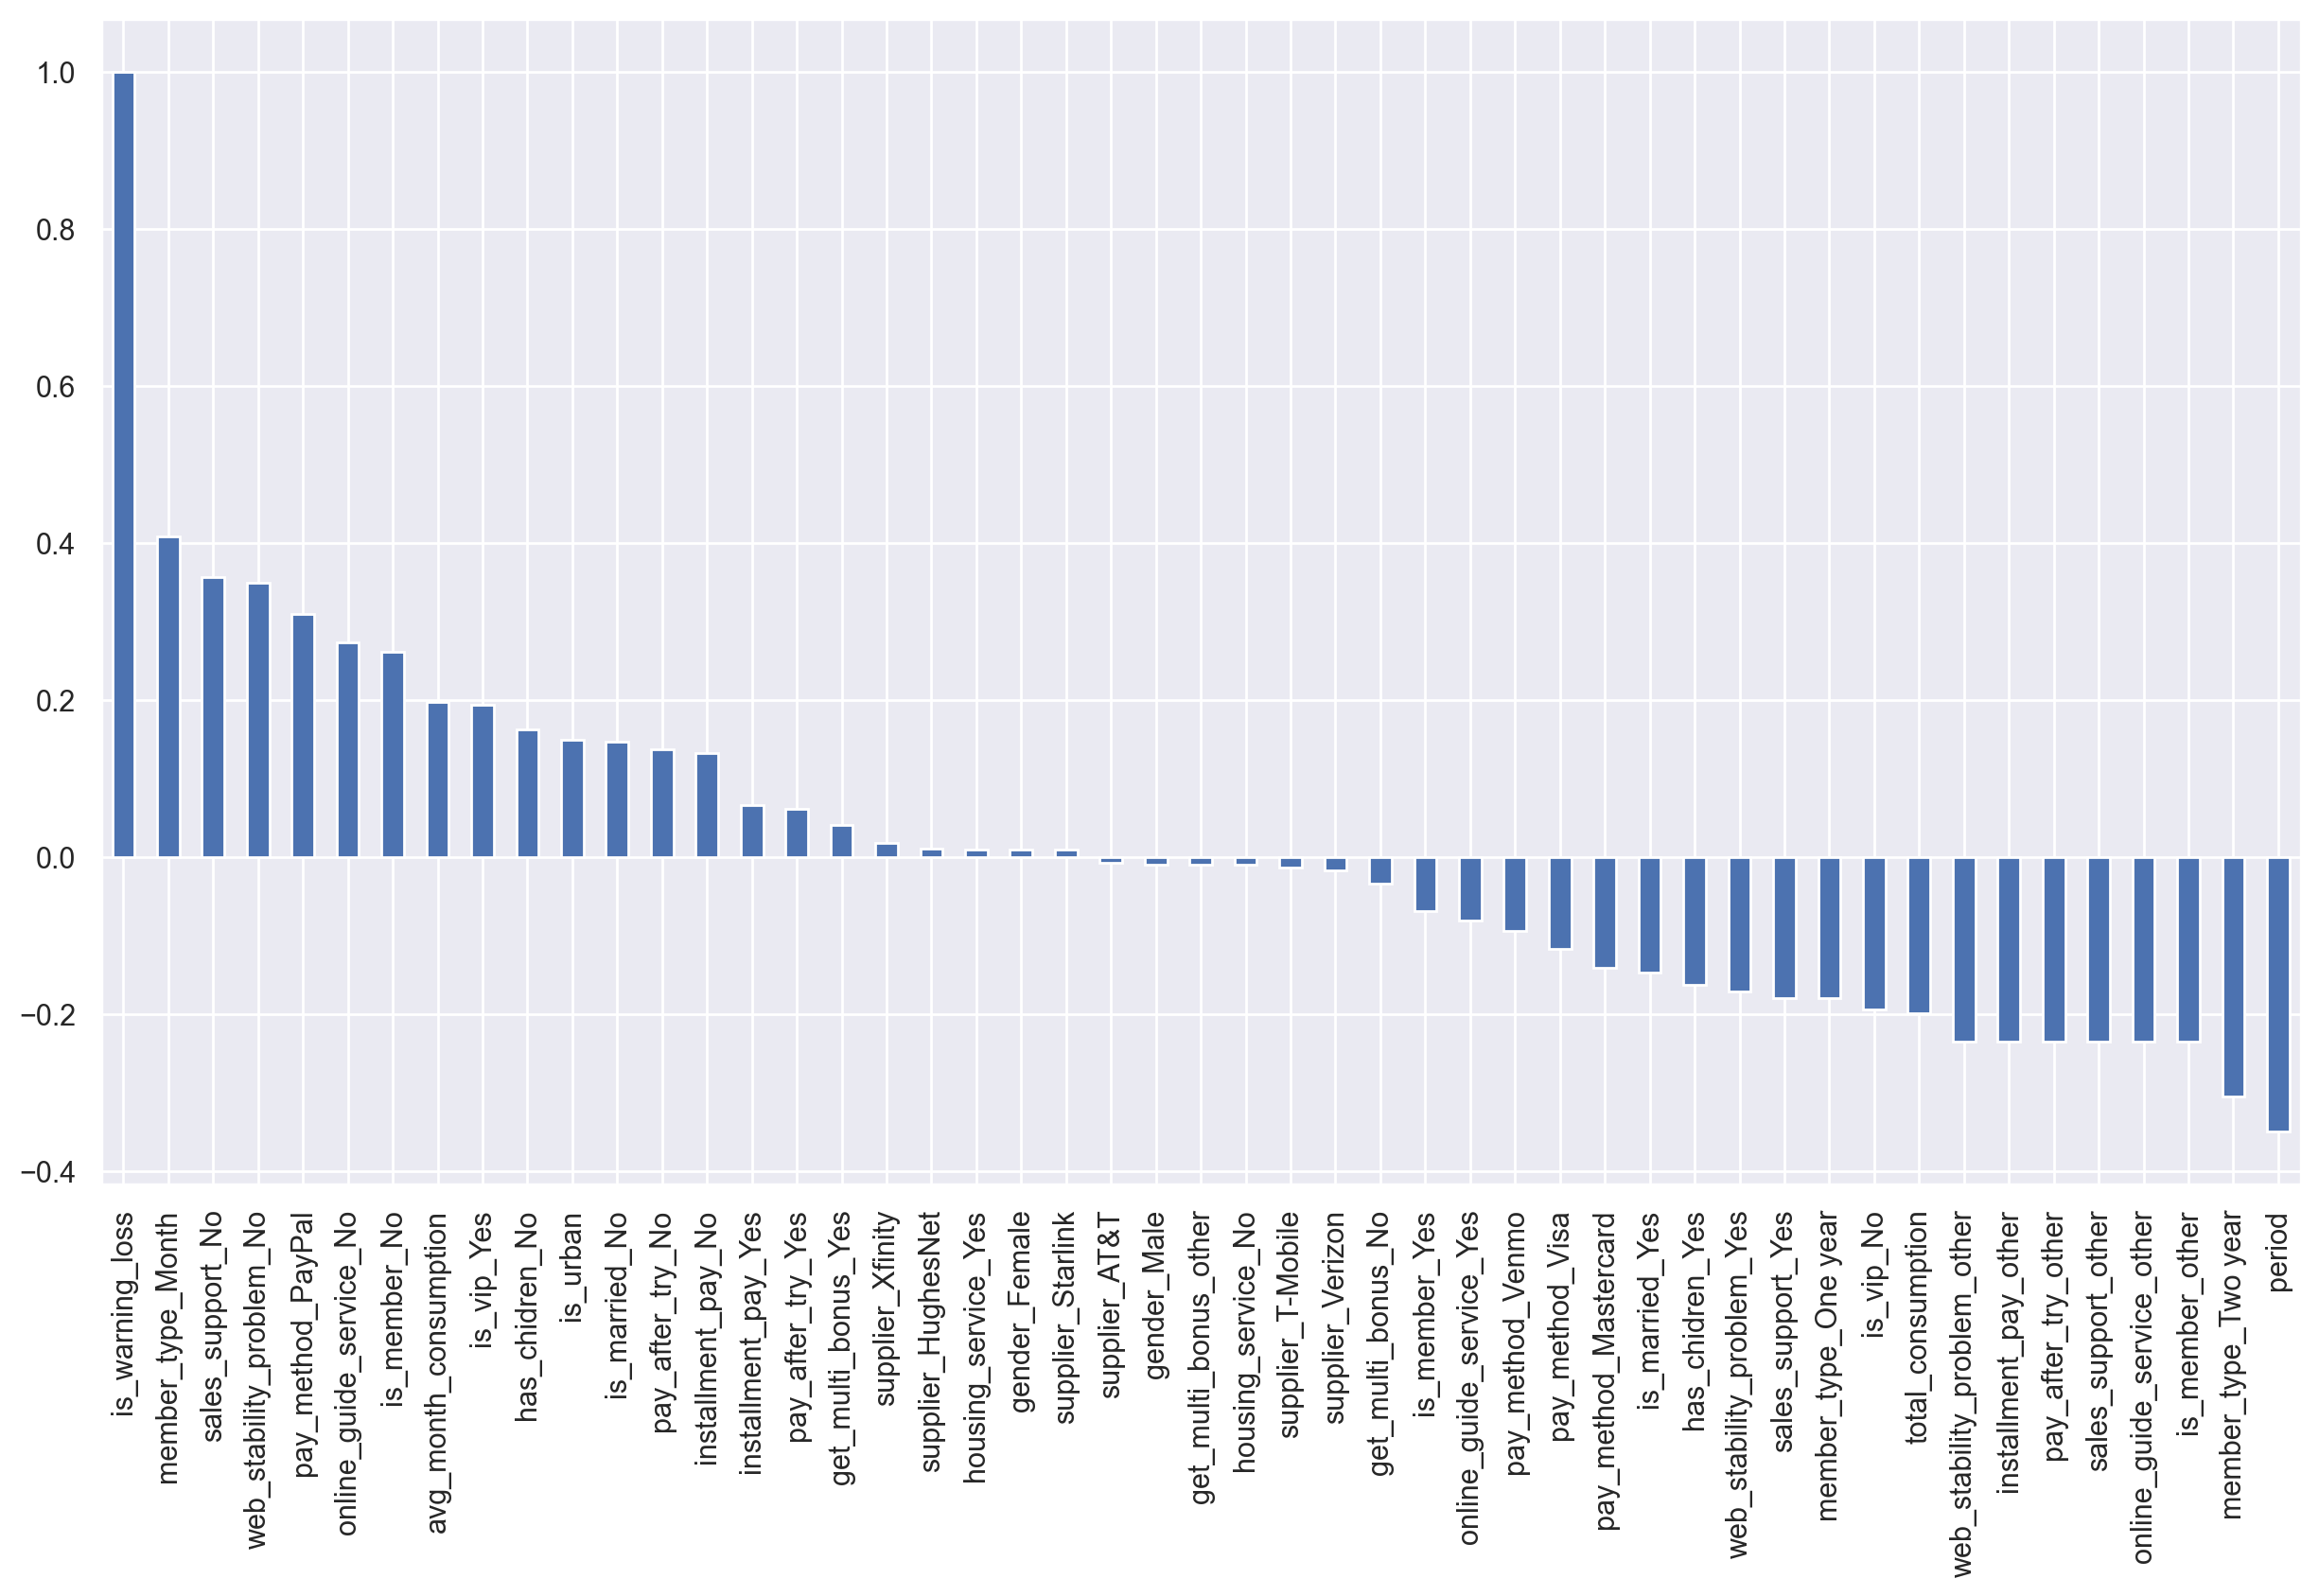

In [43]:
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(15,8), dpi=200)

df_dummies.corr()['is_warning_loss'].sort_values(ascending = False).plot(kind='bar')